Instância 'inst_19_medium_many_small_with_border_spray12' carregada com sucesso.
Gerando solução inicial com a heurística: FSM_COVERAGE_PLANNER...
  Visitou (np.int64(8), np.int64(8)), cobriu 34 novos nós. 6097 restantes.
Heurística 'Set Cover': Iniciando. 6097 alvos restantes.
  Visitou (np.int64(9), np.int64(14)), cobriu 45 novos nós. 6052 restantes.
  Visitou (np.int64(15), np.int64(16)), cobriu 24 novos nós. 6028 restantes.
  Visitou (np.int64(20), np.int64(21)), cobriu 52 novos nós. 5976 restantes.
  Visitou (np.int64(26), np.int64(22)), cobriu 51 novos nós. 5925 restantes.
  Visitou (np.int64(32), np.int64(21)), cobriu 51 novos nós. 5874 restantes.
  Visitou (np.int64(38), np.int64(20)), cobriu 62 novos nós. 5812 restantes.
  Visitou (np.int64(44), np.int64(19)), cobriu 69 novos nós. 5743 restantes.
  Visitou (np.int64(50), np.int64(20)), cobriu 67 novos nós. 5676 restantes.
  Visitou (np.int64(56), np.int64(19)), cobriu 32 novos nós. 5644 restantes.
  Visitou (np.int64(62), np.i

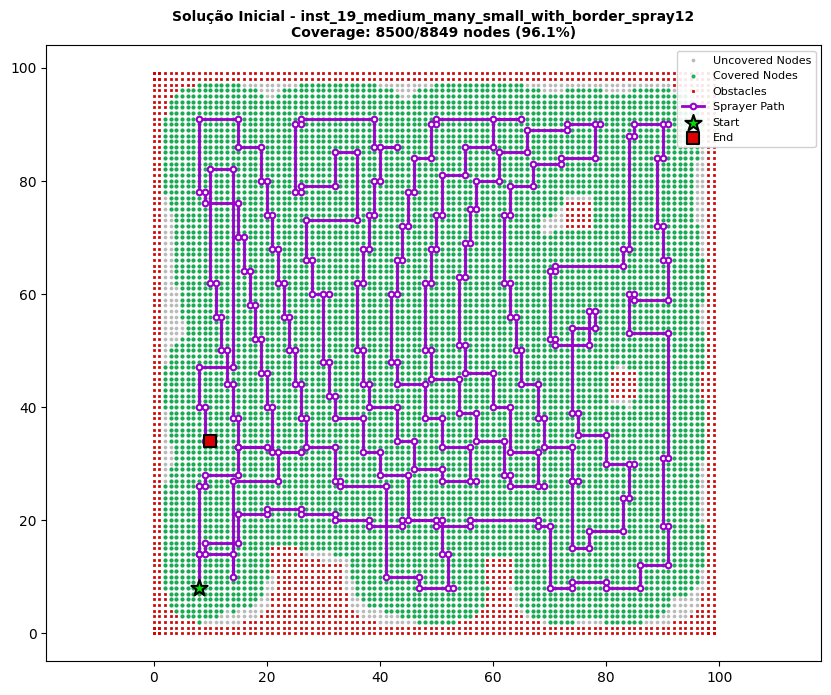

In [3]:
# Add parent directory to path for imports
import sys
import os
import pickle
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Garante que os módulos do projeto possam ser encontrados
sys.path.insert(0, str(Path().resolve()))

from agricultural_csp.instance import AgcspInstance
from agricultural_csp.evaluator import AgcspEvaluator
from agricultural_csp.solver.agcsp_ts import (
    AgcspTS, 
    TSStrategy, 
    PhasedOptimizationParams, 
    TerminationCriteria, 
    DebugOptions
)
from agricultural_csp.solver.constructive_heuristics.base_heuristics import (
    ConstructiveHeuristicType
)
# Importa a função de plotagem que corrigimos
from agricultural_csp.tools import display_grid_and_path

# --- 1. Definições da Instância ---
INSTANCES_DIR = 'agricultural_csp/instances'
# O nome exato da 'Instância 02' (baseado nos seus logs)
INSTANCE_NAME_TO_LOAD = 'inst_19_medium_many_small_with_border_spray12'
instance_filepath = os.path.join(INSTANCES_DIR, f"{INSTANCE_NAME_TO_LOAD}.pkl")

# --- 2. Carregar a Instância ---
try:
    with open(instance_filepath, 'rb') as f:
        instance = pickle.load(f)
    print(f"Instância '{INSTANCE_NAME_TO_LOAD}' carregada com sucesso.")
except FileNotFoundError:
    print(f"ERRO: Instância '{INSTANCE_NAME_TO_LOAD}.pkl' não encontrada em {INSTANCES_DIR}")
    sys.exit(1)

# --- 3. Configurar o Solver (Apenas para acessar a heurística) ---
evaluator = AgcspEvaluator(instance)

strategy = TSStrategy(
    constructive_heuristic=ConstructiveHeuristicType.FSM_COVERAGE_PLANNER,
    phased_optimization=None, # Não vamos otimizar
    search_strategy='first'
)

# Critérios e debug (não serão usados, mas necessários para o construtor)
term_criteria = TerminationCriteria(max_iterations=1)
debug_options = DebugOptions(verbose=False)

ts = AgcspTS(instance, tenure=10, strategy=strategy, 
             termination_criteria=term_criteria, 
             debug_options=debug_options)

# --- 4. Gerar e Mostrar a Solução Inicial ---
print(f"Gerando solução inicial com a heurística: {strategy.constructive_heuristic.name}...")

# Usamos o método 'build_initial_solution' (que é a versão pública do _constructive_heuristic)
initial_sol = ts._constructive_heuristic(strategy.constructive_heuristic)

print("Plotando a solução inicial...")
display_grid_and_path(instance, evaluator, initial_sol.path, 
                      title_suffix=f"Solução Inicial - {INSTANCE_NAME_TO_LOAD}")